In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
data = pd.read_csv('train.csv')
print(data.shape)

(42000, 785)


In [2]:
X = data.iloc[:,1:]
print(X.shape)
Y = data.iloc[:,0]
print(Y.shape)


(42000, 784)
(42000,)


In [3]:
#Let's filter the matrices X and Y taking only the datapoints with label 0 or 6 or 9
filter_069 = (Y==0) | (Y==6) | (Y==9)
X = X[filter_069].T #mxn with m<n
Y = Y[filter_069].T
print(X.shape)
print(Y.shape)

(784, 12457)
(12457,)


In [4]:
# N = number of datapoints in the X matrix
N = X.shape[1]
print(f"N = {N}")

Ntrain = int(N * 0.8)
print(f"Ntrain = {Ntrain}")


N = 12457
Ntrain = 9965


In [5]:
#Lets sample the the matrices to take the train set
Xtrain = X.sample(n = Ntrain, axis = 1, random_state = 42) #axis 1 means that it samples the columns  (in this case the datapoints)
Ytrain = Y.sample(n = Ntrain, axis = 0, random_state=42) #axis 0 means that i tsample the rows (in this case the features=pixels)

print(Xtrain.shape) #m x Ntrain
print(Ytrain.shape) # Nttrain x 1

(784, 9965)
(9965,)


In [6]:
#lets take the test set composed by the columns/rows not sampled during 
#the creation of the Train set 
Xtest = X[[col for col in X.columns if col not in Xtrain]] # m x Ntest
print(Xtest.shape)

Ytest = Y.drop(Ytrain.index) # Ntest x 1
print(Ytest.shape)

(784, 2492)
(2492,)


In [7]:
#m is the number of features(784) that we wanto to project into a lowerdimensional space k 
#with k << m
def centroid(X):
    return np.mean(X,axis=1) #axis=1 meaning the mean of the columns

cX = centroid(Xtrain)#is the average of each feature summed for all data points
print(cX.shape)

cX = np.reshape(cX, (784,1))
print(cX.shape)

Xctrain = Xtrain- cX
print(Xctrain.shape)



(784,)
(784, 1)
(784, 9965)


In [8]:
k = 2
m,n = Xctrain.shape
U, s ,VT = np.linalg.svd(Xctrain, full_matrices = True)
#full matrices = True in this case the dimension of the matrices will be respectivly 
#U: mxm, s: mx1, VT: nxn

S = np.zeros((m,n))
S[:m, :m] = np.diag(s)


Uk = U[:, :k]# because U has column vectors
Sk = S[:k, :k] 
VTk = VT[:k, :]# because VT has row vectors

print(Uk.shape)#m x 2
print(Sk.shape)# 2 x 2
print(VTk.shape)# 2 x Ntrain


(784, 2)
(2, 2)
(2, 9965)


In [9]:
P = Uk.T # 2 x m

#project X into Z
Zk = P @ Xctrain #(2 x m) * (m x Ntrain)
print(Zk.shape) # 2 x Ntrain


Zk_0 = Zk.loc[:,Ytrain==0]#projection matrix of 0 compressed in 2 "pixels" rather than 784
Zk_6 = Zk.loc[:,Ytrain==6]
Zk_9 = Zk.loc[:,Ytrain==9]

print(Zk_0.shape)
print(Zk_6.shape)
print(Zk_9.shape)


(2, 9965)
(2, 3346)
(2, 3298)
(2, 3321)


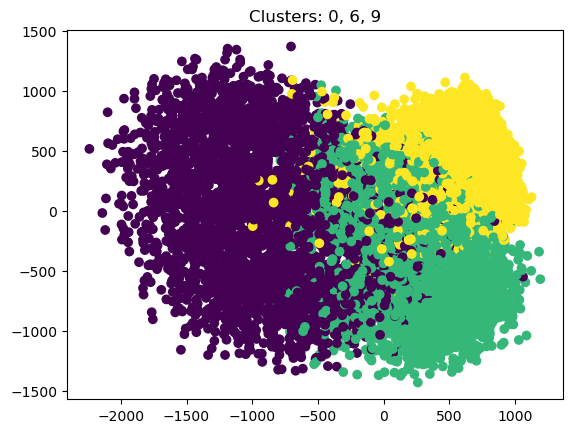

In [10]:
plt.scatter(Zk.iloc[0, :], Zk.iloc[1, :], c=Ytrain)
plt.title("Clusters: 0, 6, 9")
plt.show()

In [11]:
centroid_Zk_0 = centroid(Zk_0)
centroid_Zk_6 = centroid(Zk_6)
centroid_Zk_9 = centroid(Zk_9)

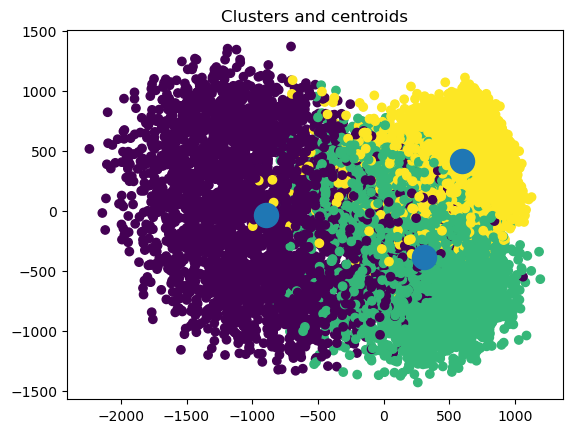

In [12]:
XX = [centroid_Zk_0[0], centroid_Zk_6[0], centroid_Zk_9[0]]
YY = [centroid_Zk_0[1], centroid_Zk_6[1], centroid_Zk_9[1]]


plt.scatter(Zk.iloc[0, :], Zk.iloc[1, :], c=Ytrain)
plt.scatter(XX,YY, s = 300)
plt.title("Clusters and centroids")
plt.show()

In [13]:
print(f"Average distance from centroid in cluster 1(digit 0): {np.mean(np.linalg.norm((Zk_0.T- centroid_Zk_0).T, axis=0))}")
print(f"Average distance from centroid in cluster 2(digit 6): {np.mean(np.linalg.norm((Zk_6.T-centroid_Zk_6).T, axis=0))}")
print(f"Average distance from centroid in cluster 3(digit 9): {np.mean(np.linalg.norm((Zk_9.T-centroid_Zk_9).T, axis=0))}")

Average distance from centroid in cluster 1(digit 0): 732.2600542481243
Average distance from centroid in cluster 2(digit 6): 538.9170035313048
Average distance from centroid in cluster 3(digit 9): 367.7152062913237


### The data points in the cluster corresponding to the digit 0 are more widely dispersed around the centroid, indicating greater variance. This observation is further supported by the calculation of the average distance from the centroid, which is the largest among all clusters in this case. 

### The average distance from the centroid for each cluster measures how well the principal components capture the variance within the clusters.

In [14]:
cXtest = centroid(Xtest)
cXtest = np.reshape(cXtest, (784,1))

Xctest = Xtest- cXtest
print(Xctest.shape)


(784, 2492)


In [15]:
Zktest = P @ Xctest #(2 x m) * (m x Ntest)
print(Zktest.shape) # 2 x Ntest

(2, 2492)


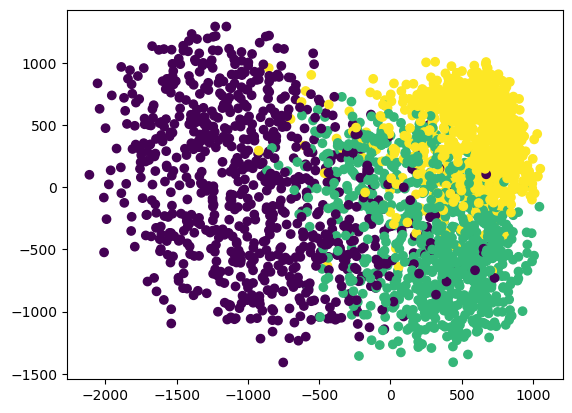

In [16]:
plt.scatter(Zktest.iloc[0, :], Zktest.iloc[1, :], c=Ytest)
plt.show()

In [17]:
Zktest_0 = Zktest.loc[:,Ytest==0]
Zktest_6 = Zktest.loc[:,Ytest==6]
Zktest_9 = Zktest.loc[:,Ytest==9]

In [18]:
print(f"Average distance from centroid in cluster 1: {np.mean(np.linalg.norm((Zktest_0.T- centroid_Zk_0).T, axis=0))}")
print(f"Average distance from centroid in cluster 2: {np.mean(np.linalg.norm((Zktest_6.T-centroid_Zk_6).T, axis=0))}")
print(f"Average distance from centroid in cluster 3: {np.mean(np.linalg.norm((Zktest_9.T-centroid_Zk_9).T, axis=0))}")

Average distance from centroid in cluster 1: 755.9440032530536
Average distance from centroid in cluster 2: 544.801149327406
Average distance from centroid in cluster 3: 361.86949689078335


### We can see that the avarage distances from the cluster's data points to the centroids are almost the same of that ones computed using the training set.

### This indicates that the distribution of clusters in space has been identified.
### As in the training set, here too, digit 0 is the one with the greatest distance from centroid, as can also be seen from the plot, due to the dispersion of the datapoints.

In [19]:
rightclass = 0
for el in range(len(Zktest.columns)):
    x = Zktest.iloc[:,el]
    d0 = np.linalg.norm(x-centroid_Zk_0,2)
    d6 = np.linalg.norm(x-centroid_Zk_6,2)
    d9 = np.linalg.norm(x-centroid_Zk_9,2)
    
    if min(d0,d6,d9) == d0:
        if Ytest.iloc[el] == 0:
            rightclass += 1
    
    if min(d0,d6,d9) == d6:
        if Ytest.iloc[el] == 6:
            rightclass += 1
    
    if min(d0,d6,d9) == d9:
        if Ytest.iloc[el] == 9:
            rightclass += 1
            
            
miss_error = rightclass/len(Zktest.columns)
print(f'The missclassification error for the test set is: {1-miss_error}')
        

The missclassification error for the test set is: 0.1649277688603531


In [27]:
X = data.iloc[:,1:]
Y = data.iloc[:,0]

def PCA(X, Y, digit1, digit2, digit3, k=2):
    # Filtering
    filter = (Y == digit1) | (Y == digit2) | (Y == digit3)
    X = X[filter].T
    Y = Y[filter].T
    
    N = X.shape[1]
    Ntrain = int(N * 0.8)
    
    # Split in train and test set
    Xtrain = X.sample(n=Ntrain, axis=1, random_state=42)
    Ytrain = Y.sample(n=Ntrain, axis=0, random_state=42)
    
    Xtest = X[[col for col in X.columns if col not in Xtrain]]
    Ytest = Y.drop(Ytrain.index)
    
    # Compute the centroids
    cX = centroid(Xtrain)
    cX = np.reshape(cX, (784, 1))
    
    # Center the data
    Xctrain = Xtrain - cX
    
    # Compute the SVD
    m, n = Xctrain.shape
    U, s, VT = np.linalg.svd(Xctrain, full_matrices=True)
    S = np.zeros((m, n))
    S[:m, :m] = np.diag(s)
    
    # k approximation
    Uk = U[:, :k]
    Sk = S[:k, :k]
    VTk = VT[:k, :]
    P = Uk.T
    
    # Project X into Z
    Zk = P @ Xctrain
    
    # Split projected data by class
    Zk_1 = Zk.loc[:, Ytrain == digit1]
    Zk_2 = Zk.loc[:, Ytrain == digit2]
    Zk_3 = Zk.loc[:, Ytrain == digit3]
    
    # Compute centroids in Z space
    centroid_Zk_1 = centroid(Zk_1)
    centroid_Zk_2 = centroid(Zk_2)
    centroid_Zk_3 = centroid(Zk_3)
    
    # Store centroids
    centroids_Zk = np.array([centroid_Zk_1, centroid_Zk_2, centroid_Zk_3])
    
    cXtest = centroid(Xtest)
    cXtest = np.reshape(cXtest, (784, 1))
    
    Xctest = Xtest - cXtest
    Zktest = P @ Xctest
    
    # Split test set projections
    Zktest_1 = Zktest.loc[:, Ytest == digit1]
    Zktest_2 = Zktest.loc[:, Ytest == digit2]
    Zktest_3 = Zktest.loc[:, Ytest == digit3]
    
    # Plot results
    plt.figure(figsize=(15, 9))
    
    if k == 2:
        plt.subplot(1, 2, 1)
        plt.title("Clusters and centroids (Train set)")
        plt.scatter(Zk.iloc[0, :], Zk.iloc[1, :], c=Ytrain)
        plt.scatter(centroids_Zk[:, 0], centroids_Zk[:, 1], s=300)
        
        plt.subplot(1, 2, 2)
        plt.title("Clusters and centroids (Test set)")
        plt.scatter(Zktest.iloc[0, :], Zktest.iloc[1, :], c=Ytest)
        plt.scatter(centroids_Zk[:, 0], centroids_Zk[:, 1], s=300)
    
    elif k == 3:
        ax1 = plt.subplot(1, 2, 1, projection='3d')
        ax1.set_title("Clusters and centroids (Train set)")
        ax1.scatter(Zk.iloc[0, :], Zk.iloc[1, :], Zk.iloc[2, :], c=Ytrain)
        ax1.scatter(centroids_Zk[:, 0], centroids_Zk[:, 1], centroids_Zk[:, 2], s=300)
        
        ax2 = plt.subplot(1, 2, 2, projection='3d')
        ax2.set_title("Clusters and centroids (Test set)")
        ax2.scatter(Zktest.iloc[0, :], Zktest.iloc[1, :], Zktest.iloc[2, :], c=Ytest)
        ax2.scatter(centroids_Zk[:, 0], centroids_Zk[:, 1], centroids_Zk[:, 2], s=300)
    
    plt.show()
    
    # Compute and print metrics
    print("Using the training set")
    print(f"Average distance from centroid in cluster 1 (digit {digit1}): {np.mean(np.linalg.norm((Zk_1.T - centroid_Zk_1).T, axis=0))}")
    print(f"Average distance from centroid in cluster 2 (digit {digit2}): {np.mean(np.linalg.norm((Zk_2.T - centroid_Zk_2).T, axis=0))}")
    print(f"Average distance from centroid in cluster 3 (digit {digit3}): {np.mean(np.linalg.norm((Zk_3.T - centroid_Zk_3).T, axis=0))}")
    print(" ")
    print("Using the test set")
    print(f"Average distance from centroid in cluster 1 (digit {digit1}): {np.mean(np.linalg.norm((Zktest_1.T - centroid_Zk_1).T, axis=0))}")
    print(f"Average distance from centroid in cluster 2 (digit {digit2}): {np.mean(np.linalg.norm((Zktest_2.T - centroid_Zk_2).T, axis=0))}")
    print(f"Average distance from centroid in cluster 3 (digit {digit3}): {np.mean(np.linalg.norm((Zktest_3.T - centroid_Zk_3).T, axis=0))}")
    
    rightclass = 0
    for el in range(len(Zktest.columns)):
        x = Zktest.iloc[:, el]
        d1 = np.linalg.norm(x - centroid_Zk_1, 2)
        d2 = np.linalg.norm(x - centroid_Zk_2, 2)
        d3 = np.linalg.norm(x - centroid_Zk_3, 2)
        
        if min(d1, d2, d3) == d1:
            if Ytest.iloc[el] == digit1:
                rightclass += 1
        
        if min(d1, d2, d3) == d2:
            if Ytest.iloc[el] == digit2:
                rightclass += 1
        
        if min(d1, d2, d3) == d3:
            if Ytest.iloc[el] == digit3:
                rightclass += 1
    
    miss_error = rightclass / len(Zktest.columns)
    print(" ")
    print(f'The misclassification error for the test set is: {1-miss_error}')


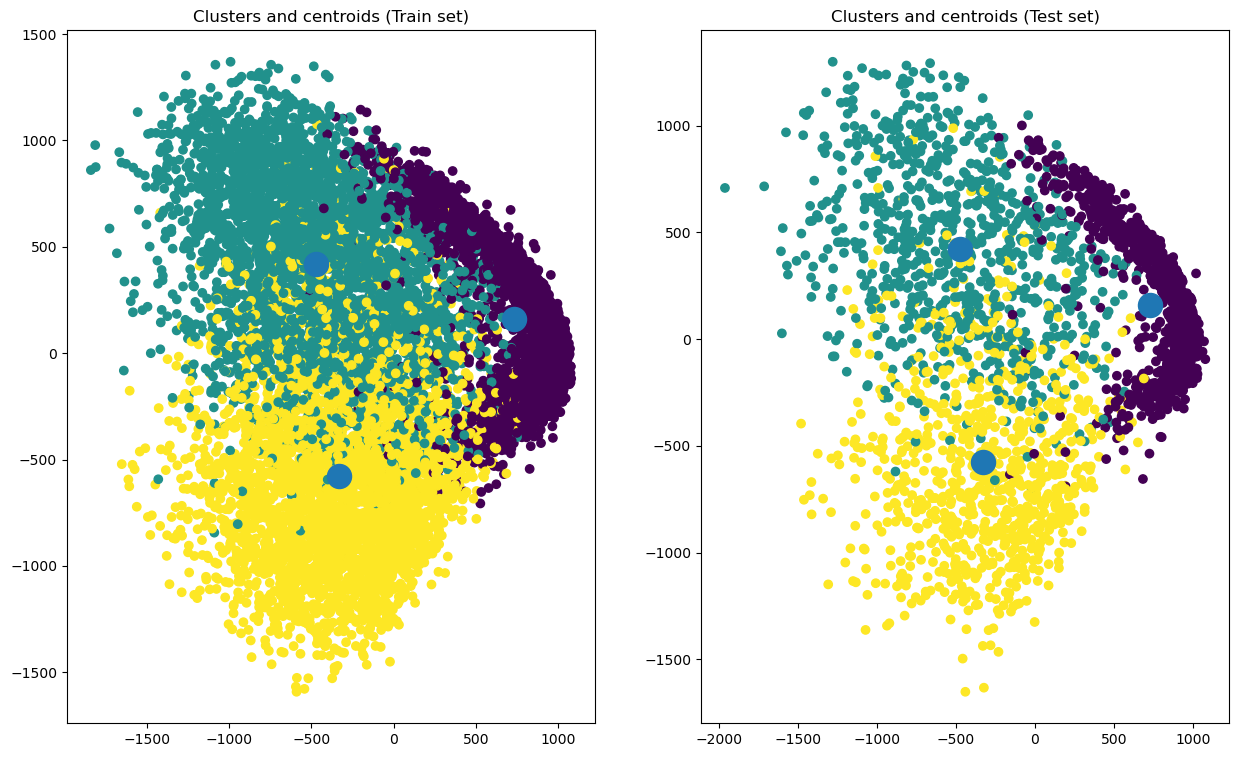

Using the training set
Average distance from centroid in cluster 1 (digit 3): 528.6494547839593
Average distance from centroid in cluster 2 (digit 1): 386.44487101695756
Average distance from centroid in cluster 3 (digit 2): 544.6839011504014
 
Using the test set
Average distance from centroid in cluster 1 (digit 3): 521.65204121775
Average distance from centroid in cluster 2 (digit 1): 374.50268964513066
Average distance from centroid in cluster 3 (digit 2): 563.0553024524659
 
The misclassification error for the test set is: 0.13166855845629966


In [22]:
PCA(X, Y, 3, 1, 2)

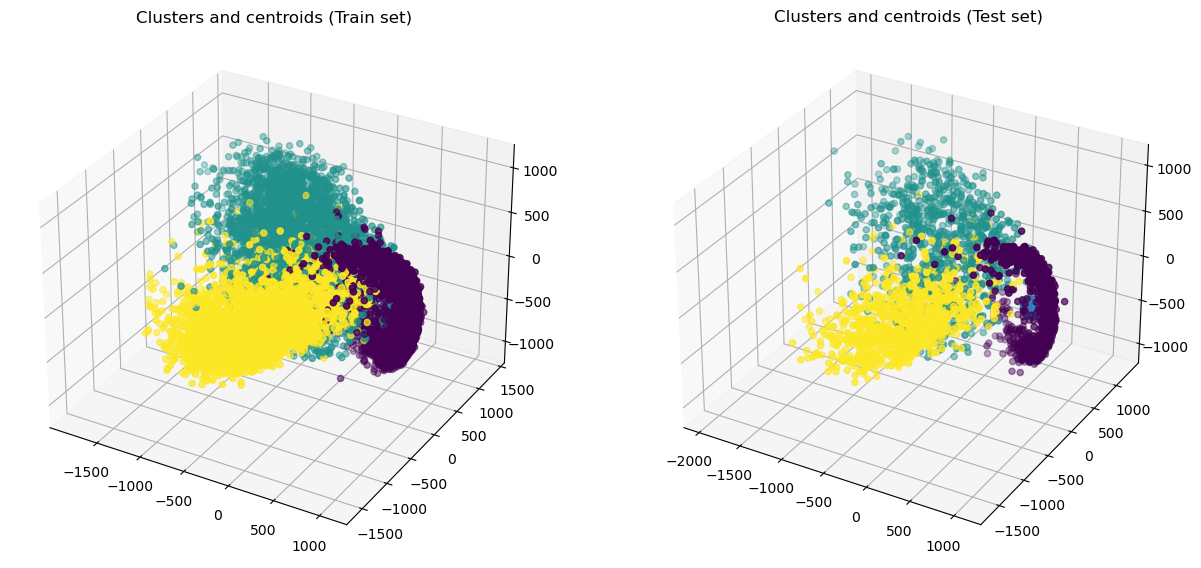

Using the training set
Average distance from centroid in cluster 1 (digit 3): 605.8529487008241
Average distance from centroid in cluster 2 (digit 1): 663.1596289842573
Average distance from centroid in cluster 3 (digit 2): 650.8146370544366
 
Using the test set
Average distance from centroid in cluster 1 (digit 3): 595.5941341652957
Average distance from centroid in cluster 2 (digit 1): 655.9337016057892
Average distance from centroid in cluster 3 (digit 2): 669.2714022141445
 
The misclassification error for the test set is: 0.11539916761256153


In [23]:
PCA(X, Y, 3, 1, 2, 3)

### We can see that by increasing the number k from 2 to 3 the missclassification error has decreased. This is because we used an additional principal component in order to keep more information about the data

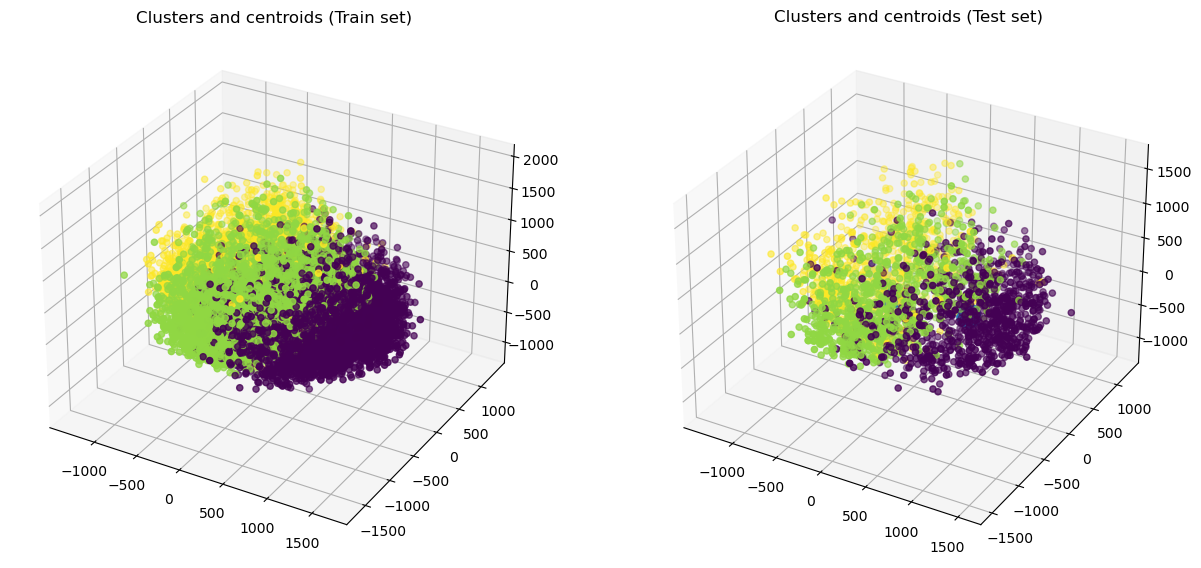

Using the training set
Average distance from centroid in cluster 1 (digit 3): 701.2058748920167
Average distance from centroid in cluster 2 (digit 8): 724.0822879767857
Average distance from centroid in cluster 3 (digit 9): 641.235373264806
 
Using the test set
Average distance from centroid in cluster 1 (digit 3): 710.3637827683829
Average distance from centroid in cluster 2 (digit 8): 703.3244093691806
Average distance from centroid in cluster 3 (digit 9): 651.8463271287759
 
The misclassification error for the test set is: 0.1975406584688616


In [28]:
PCA(X, Y, 3, 8, 9, 3)

### In this case, trying to classify the same digits (3,8,9) used in the previous exercise, the missclassification error is slightly higher in PCA.